### Importando Bibliotecas e o Dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('servidores-2024-01.csv',sep=';',encoding='ISO-8859-1')

C:\Users\Ruan\AppData\Local\Temp\ipykernel_14020\1353852022.py:1: DtypeWarning: Columns (8,13,16,21,24,25,29,31,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('servidores-2024-01.csv',sep=';',encoding='ISO-8859-1')


## Sobre os dados
Os dados utilizados são provenientes do Portal da Tranparência do Estado de Minas Gerais e se referem ao valor empenhado em salários dos funcionários públicos estaduais.

In [3]:
df.shape

(389883, 37)

Em uma análise prévia - não inclusa nesse arquivo - notou-se a inutilidade de uma série de colunas, seja pela ausência de valores ou pela falta de utilidade dos valores ao interesse final. Tais colunas foram removidas.
Ademais, colunas com possibilidade de identificação pessoal do servidor também foram removidas.

In [4]:
removivel = ['masp','nome','descsitser','tem_apost','desccomi','decter', 'premio', 'feriasprem', 'jetons', 'bdmg', 'cemig', 'codemig', 'cohab', 'copasa','emater', 'epamig', 'funpemg', 'gasmig', 'mgi', 'mgs', 'prodemge','prominas', 'emip', 'codemge', 'emc']

In [5]:
df.drop(removivel, axis=1, inplace=True)

Fez-se a substituição da ',' por '.' para identificação da casa decimal, seguindo os padrões de referência da linguagem.

In [6]:
correct_values = ['carga_hora','remuner','teto','ferias','eventual','ir','prev','rem_pos']

In [7]:
for i in correct_values:
    new_value = df[i].replace(',','.', regex=True).astype(float)
    df[i] = new_value

In [8]:
df = df[df['carga_hora'] != 0]
df = df[df['remuner'] !=0]

Desta forma, assim ficam dispostos os dados de interesse para análise.

In [9]:
df.head(4)

,nmefet,descinst,descunid,carga_hora,remuner,teto,judic,ferias,eventual,ir,prev,rem_pos
0,CABO,CBMMG,AAS (BELO HORIZONTE),40.0,7079.02,0.0,0,0.00,3127.32,1000.28,743.29,8462.77
1,AGENTE DE SEGURANCA SOCIOEDUCATIVO,SECRETARIA DE JUSTICA E SEGURANCA PUBLICA,INF. SIGILOSA,40.0,6924.42,0.0,NAO,2308.14,2038.85,295.85,885.52,10090.04
2,PROFESSOR DE EDUCACAO BASICA,SECRETARIA DE EDUCACAO,EE PROF HILDEBRANDO PONTES,16.0,2161.12,0.0,NAO,720.37,0.00,0.00,244.60,2636.89
3,ESPEC.EM POLITICAS PUBLICAS E GESTAO GOVERNAME...,SECRETARIA DE INFRAESTRUTURA MOBILIDADEE E PAR...,SUBSECRETARIA DE TRANSPORTES E MOBILIDADE,40.0,32598.54,0.0,NAO,0.00,1351.74,7799.52,2879.54,23271.22


### Análise dos dados

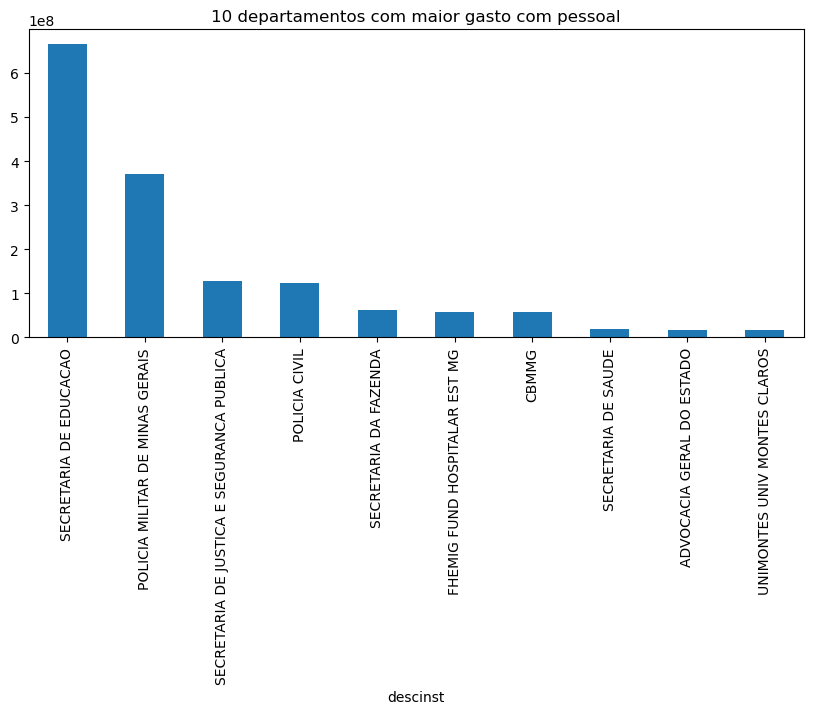

In [10]:
agg_valor_grupo = df.groupby('descinst')['remuner'].sum()
agg_valor_grupo.nlargest(10).plot(kind='bar',\
                                  figsize=(10,4),\
                                  title='10 departamentos com maior gasto com pessoal');

In [11]:
total_func = df.groupby('descinst').size()

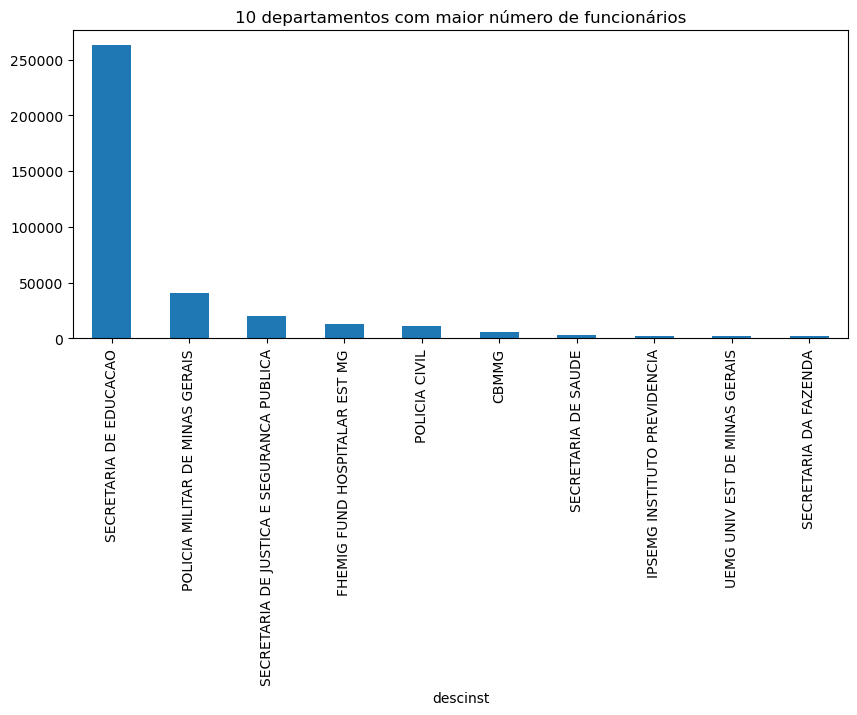

In [12]:
total_func.nlargest(10).plot(kind='bar',\
                             figsize=(10,4),\
                             title='10 departamentos com maior número de funcionários');

In [13]:
media_salario_funcionario = agg_valor_grupo/total_func

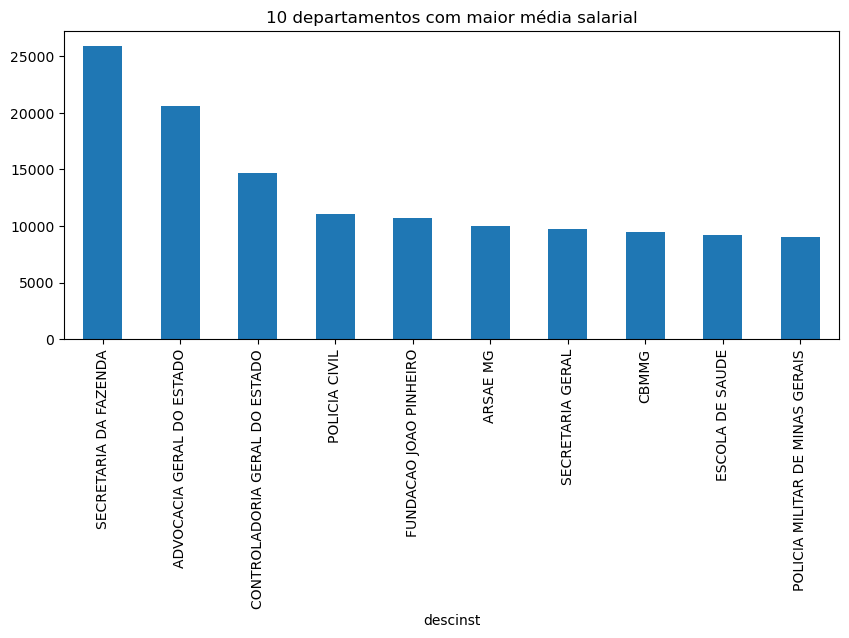

In [14]:
media_salario_funcionario.nlargest(10).plot(kind='bar',\
                                            figsize=(10,4),\
                                            title='10 departamentos com maior média salarial');

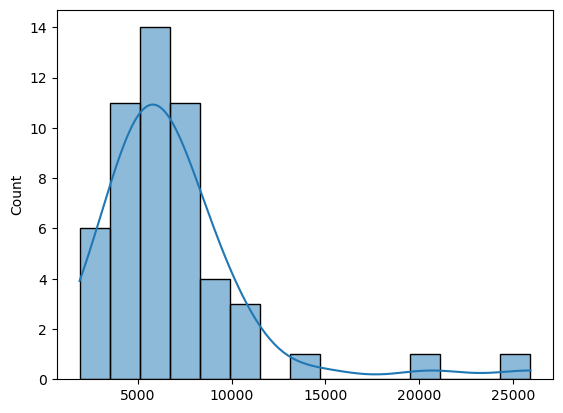

In [15]:
sns.histplot(media_salario_funcionario, kde=True);

In [16]:
carga_hora_media = df.groupby('descinst')['carga_hora'].mean()

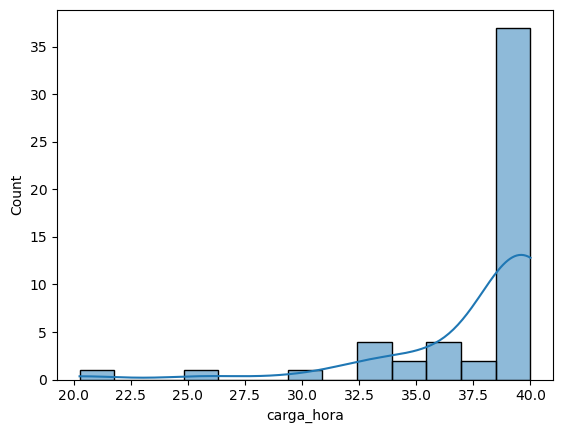

In [17]:
sns.histplot(carga_hora_media, kde=True);

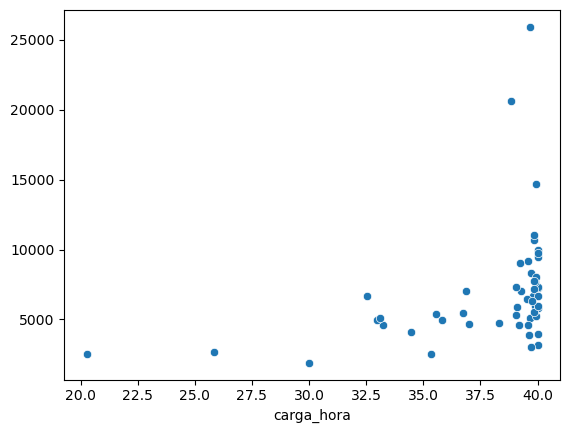

In [18]:
sns.scatterplot(df['descinst'],x=carga_hora_media, y=media_salario_funcionario);